<a href="https://colab.research.google.com/github/bush4matull4/AIML-LAB/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting features from data**

Module 1, Lab 1

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Using cached wikipedia-1.4.0-py3-none-any.whl


# **Part 1: Features of text**

How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
import wikipedia

animal1 = 'Giraffe'
animal2 = 'Elephant'

wikipedia.set_lang('en')
content_en_1 = wikipedia.page(title=animal1).content
content_en_2 = wikipedia.page(title=animal2).content

wikipedia.set_lang('fr')
content_fr_1 = wikipedia.page(title=animal1).content
content_fr_2 = wikipedia.page(title=animal2).content


This is what the text looks like:

In [ ]:
content_fr_2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def clean_text(input_str):
    input_str = input_str.lower()  # convert to lowercase
    input_str = re.sub(r'[^a-z]', '', input_str)  # retain only alphabets
    return input_str


In [ ]:
content_en_1 = clean_text(content_en_1)
content_en_2 = clean_text(content_en_2)
content_fr_1 = clean_text(content_fr_1)
content_fr_2 = clean_text(content_fr_2)


In [ ]:
print(content_en_1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssixvalidextinctspeciesofgiraffafromafricaandpakistanareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupon



Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.


In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

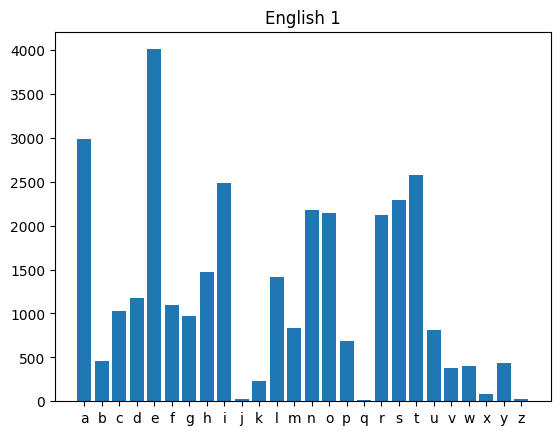

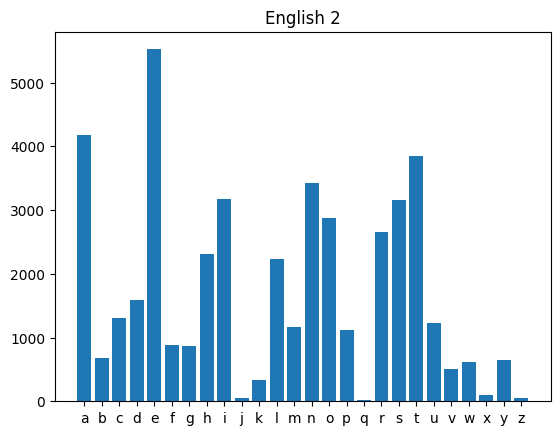

In [ ]:
unigram_eng1 = Counter(ngrams(content_en_1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(content_en_2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

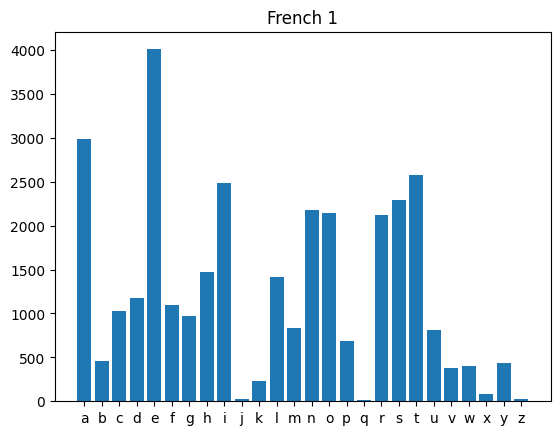

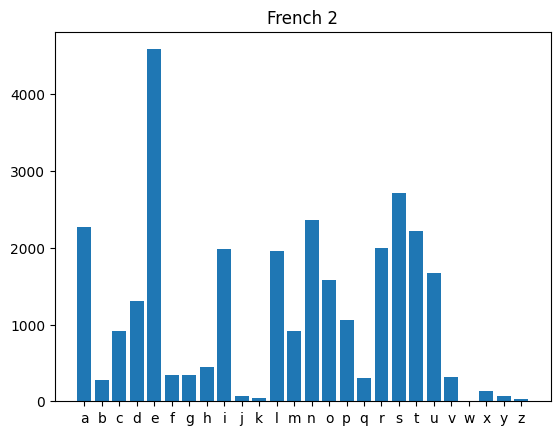

In [ ]:
unigram_fr1 = Counter(ngrams(content_fr_1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(content_fr_2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

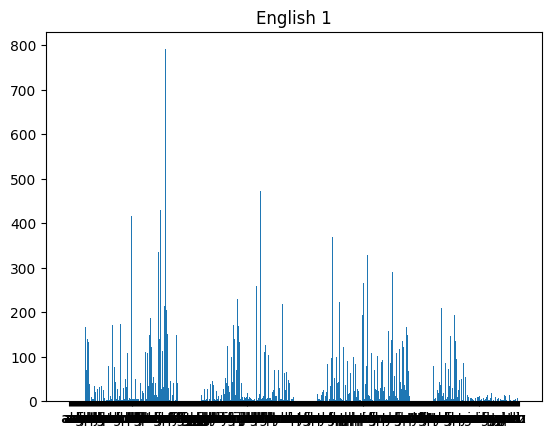

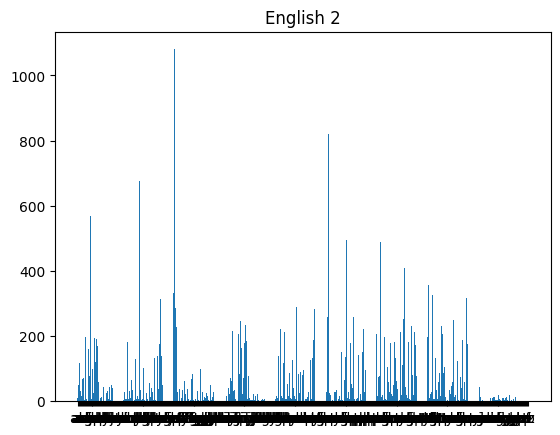

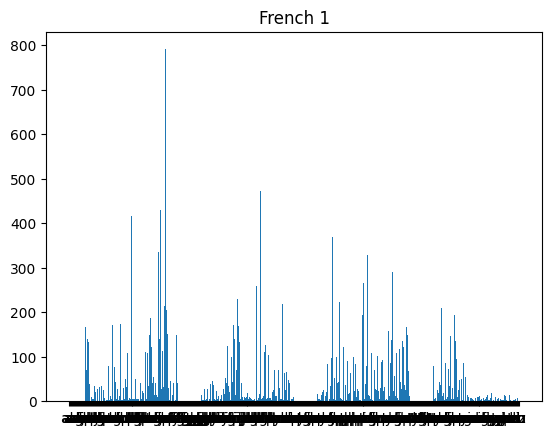

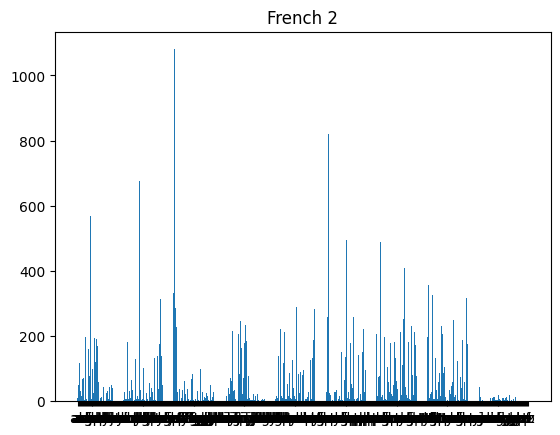

In [ ]:
bigram_eng1 = Counter(ngrams(content_fr_1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(content_fr_2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(content_fr_1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(content_fr_2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bigram_heatmap(bigram_freq):
    heatmap = np.zeros((26, 26))

    for i in range(26):
        for j in range(26):
            char1 = chr(ord('a') + i)
            char2 = chr(ord('a') + j)
            heatmap[i, j] = bigram_freq.get((char1, char2), 0)

    plt.imshow(heatmap, cmap='jet')
    plt.colorbar()
    plt.xticks(ticks=range(26), labels=[chr(i + ord('a')) for i in range(26)])
    plt.yticks(ticks=range(26), labels=[chr(i + ord('a')) for i in range(26)])
    plt.title("Character Bigram Heatmap")
    plt.xlabel("Second Character")
    plt.ylabel("First Character")
    plt.show()

    return heatmap


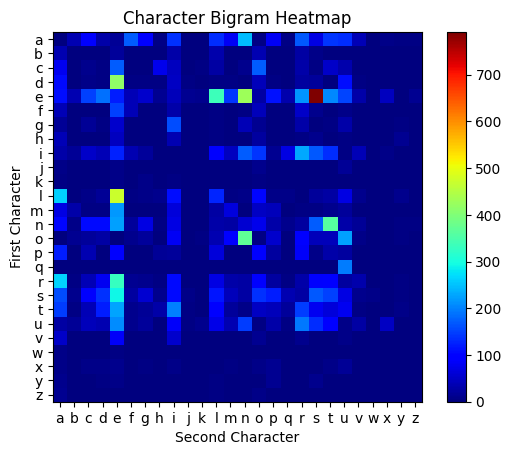

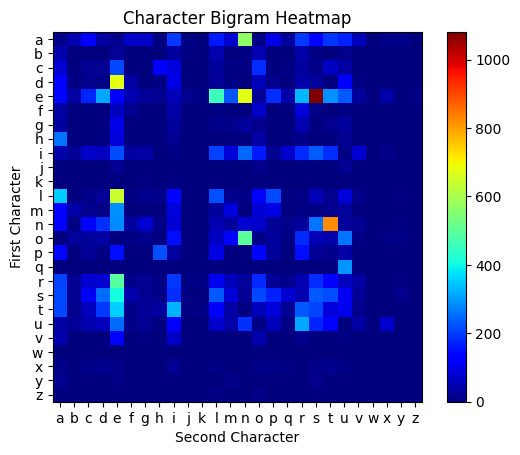

In [ ]:
bieng1 = plot_bigram_heatmap(bigram_eng1)
bieng2 = plot_bigram_heatmap(bigram_eng2)


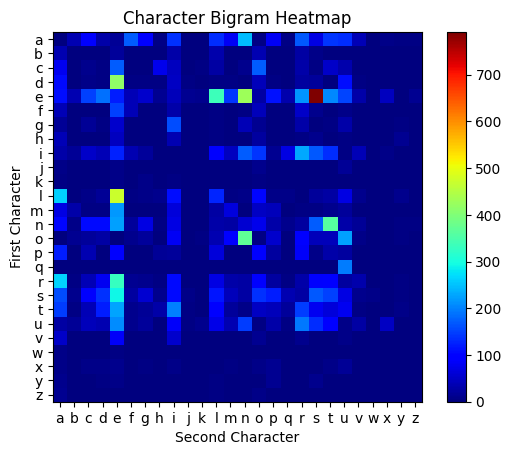

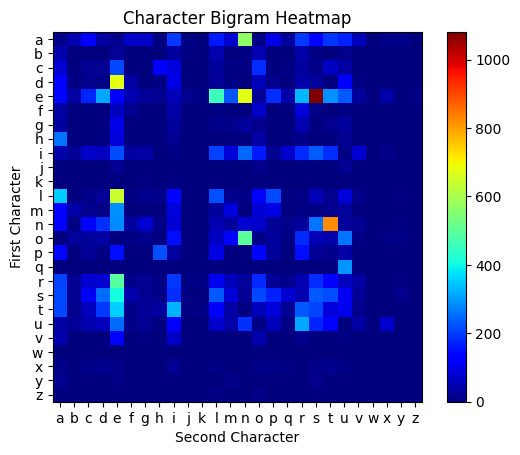

In [ ]:
bifr1 = plot_bigram_heatmap(bigram_fr1)
bifr2 = plot_bigram_heatmap(bigram_fr2)


Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace  # Debugger import (optional)

def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord('a') + i), chr(ord('a') + j))

def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

print('\nEnglish 1:')
ShowTopN(bieng1)

print('\nEnglish 2:')
ShowTopN(bieng2)

print('\nFrench 1:')
ShowTopN(bifr1)

print('\nFrench 2:')
ShowTopN(bifr2)



English 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 429.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 360.0
('e', 'l') : 335.0
('r', 'e') : 329.0
('s', 'e') : 291.0
('r', 'a') : 265.0

English 2:
('e', 's') : 1080.0
('n', 't') : 820.0
('d', 'e') : 676.0
('e', 'n') : 672.0
('l', 'e') : 639.0
('a', 'n') : 567.0
('o', 'n') : 495.0
('r', 'e') : 490.0
('e', 'l') : 456.0
('s', 'e') : 409.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 429.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 360.0
('e', 'l') : 335.0
('r', 'e') : 329.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1080.0
('n', 't') : 820.0
('d', 'e') : 676.0
('e', 'n') : 672.0
('l', 'e') : 639.0
('a', 'n') : 567.0
('o', 'n') : 495.0
('r', 'e') : 490.0
('e', 'l') : 456.0
('s', 'e') : 409.0




We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).

A few ways to explore:

    Try with different languages.
    The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
    How can we use and visualize trigrams and higher n-grams?



lets explore

In [7]:
pip install nltk matplotlib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


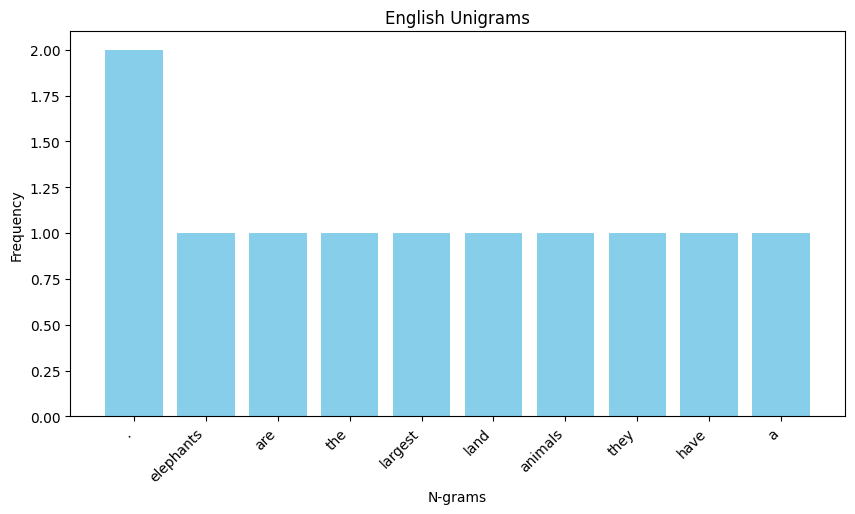

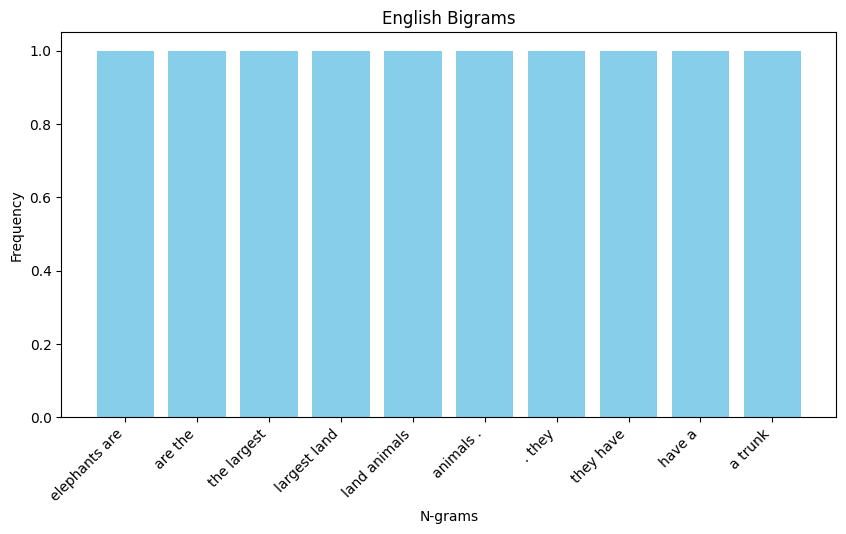

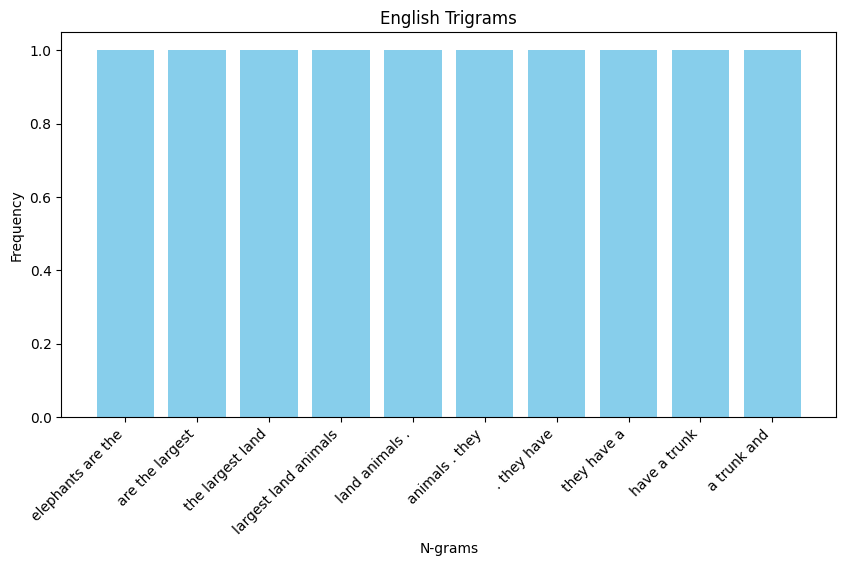

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

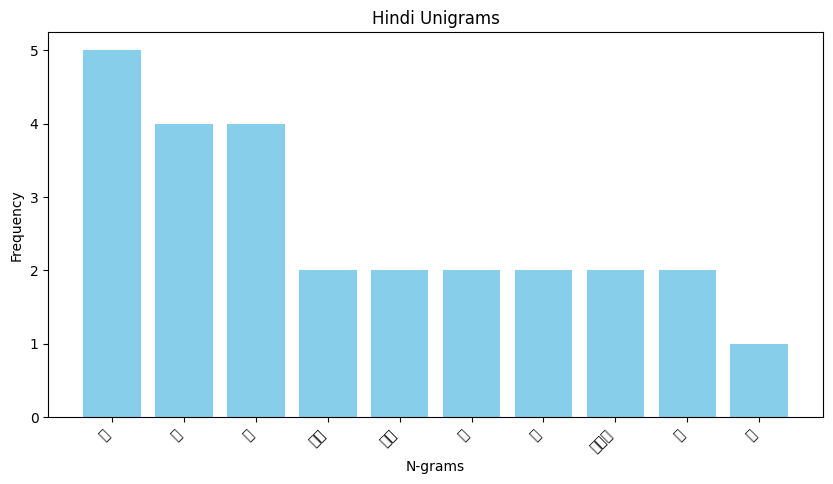

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


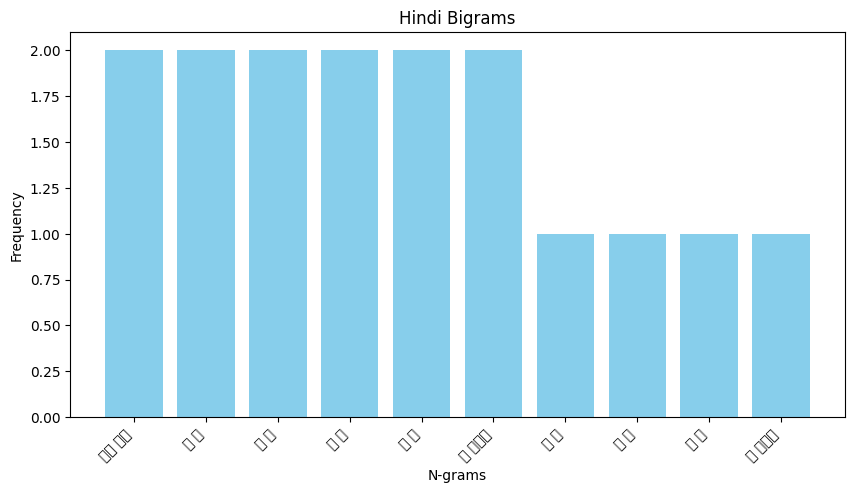

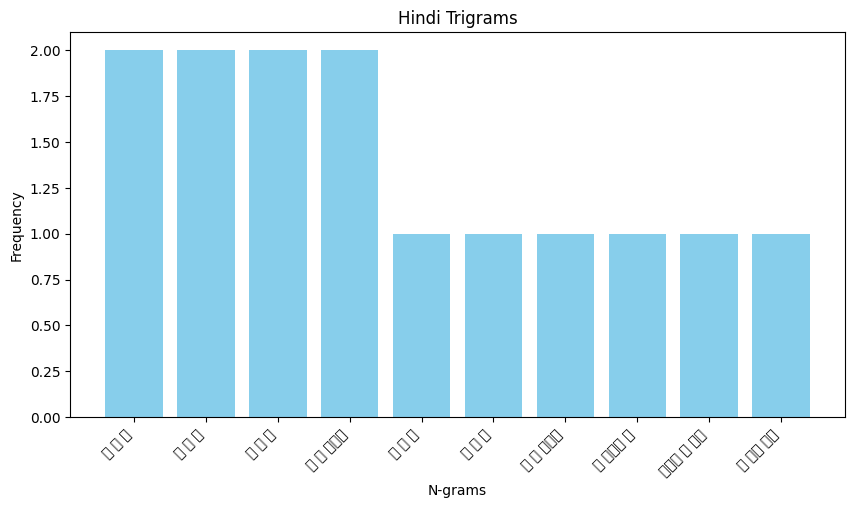

In [11]:
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Download punkt resource explicitly
nltk.download('punkt')

# Sample texts (replace or expand as needed)
text_english = "Elephants are the largest land animals. They have a trunk and large ears."
text_hindi = "हाथी सबसे बड़े भूमि जानवर होते हैं। उनके पास एक सूंड और बड़े कान होते हैं।"

# Use wordpunct_tokenize instead — language-neutral
tokens_english = nltk.wordpunct_tokenize(text_english.lower())
tokens_hindi = nltk.wordpunct_tokenize(text_hindi.lower())

# Function to get n-gram frequencies
def get_ngram_freq(tokens, n):
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

# Get unigram, bigram, trigram frequencies for both texts
unigrams_en = get_ngram_freq(tokens_english, 1)
bigrams_en = get_ngram_freq(tokens_english, 2)
trigrams_en = get_ngram_freq(tokens_english, 3)

unigrams_hi = get_ngram_freq(tokens_hindi, 1)
bigrams_hi = get_ngram_freq(tokens_hindi, 2)
trigrams_hi = get_ngram_freq(tokens_hindi, 3)

# Function to plot frequency distribution
def plot_ngram_freq(freq_dist, title, num=10):
    common = freq_dist.most_common(num)
    ngrams_, counts = zip(*common)
    labels = [' '.join(gram) for gram in ngrams_]

    plt.figure(figsize=(10,5))
    plt.bar(labels, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.show()

# Plot examples
plot_ngram_freq(unigrams_en, 'English Unigrams')
plot_ngram_freq(bigrams_en, 'English Bigrams')
plot_ngram_freq(trigrams_en, 'English Trigrams')

plot_ngram_freq(unigrams_hi, 'Hindi Unigrams')
plot_ngram_freq(bigrams_hi, 'Hindi Bigrams')
plot_ngram_freq(trigrams_hi, 'Hindi Trigrams')


# **Part 2: Written numbers**

In [ ]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [ ]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]


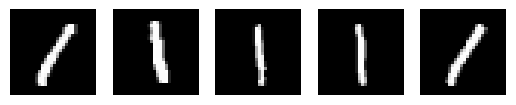

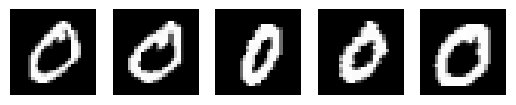

In [ ]:
import matplotlib.pyplot as plt

# Display 5 images of digit '1'
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:], cmap='gray')
  plt.axis('off')   # axis hataane ke liye
plt.show()

# Display 5 images of digit '0'
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:], cmap='gray')
  plt.axis('off')
plt.show()


suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
import numpy as np

sum1 = np.sum(no1 > 0, axis=(1, 2))
sum0 = np.sum(no0 > 0, axis=(1, 2))

print("Non-zero pixels count for first 5 images of digit 1:", sum1[:5])
print("Non-zero pixels count for first 5 images of digit 0:", sum0[:5])


Non-zero pixels count for first 5 images of digit 1: [96 93 68 75 95]
Non-zero pixels count for first 5 images of digit 0: [176 198 183 200 234]


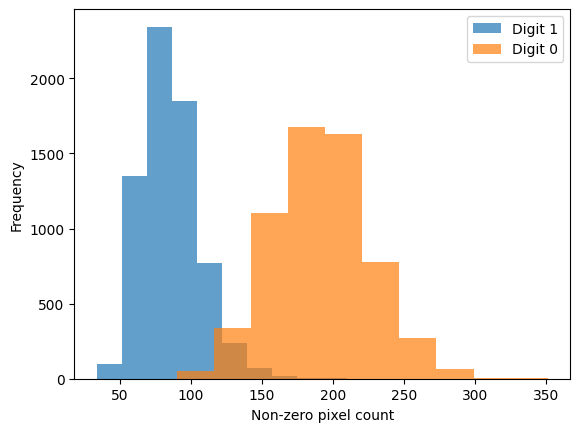

In [ ]:
plt.hist(sum1, alpha=0.7, label='Digit 1')
plt.hist(sum0, alpha=0.7, label='Digit 0')
plt.xlabel('Non-zero pixel count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[0]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2 > 0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull = im1 & im2 & im3 & im4
  hole = hull & ~(img > 0)
  return hole


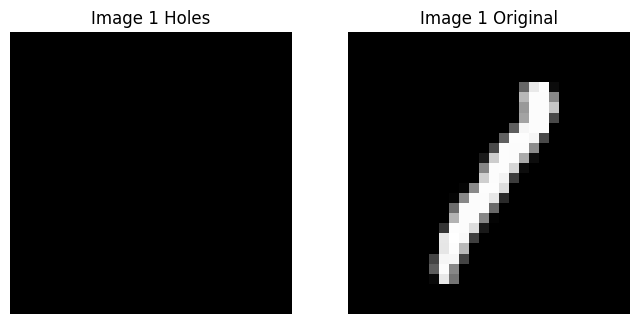

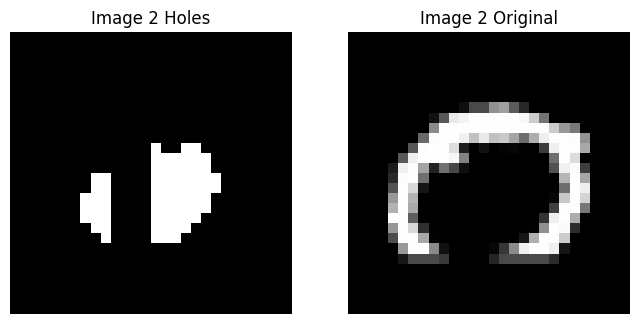

In [ ]:
imgs = [no1[456, :, :], no0[456, :, :]]

for idx, img in enumerate(imgs):
    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.title(f'Image {idx+1} Holes')
    plt.imshow(getHolePixels(img), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Image {idx+1} Original')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.show()


In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])


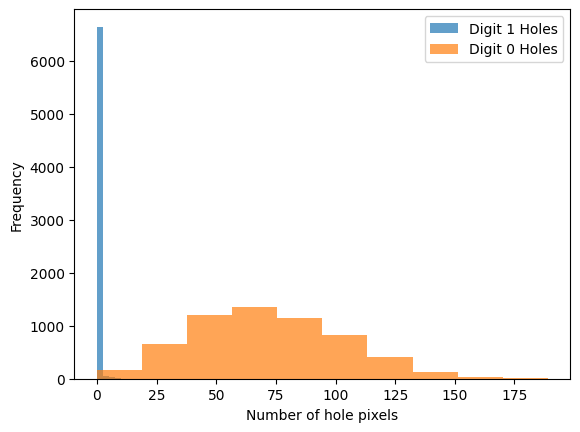

In [ ]:
plt.hist(hole1, alpha=0.7, label='Digit 1 Holes')
plt.hist(hole0, alpha=0.7, label='Digit 0 Holes')
plt.xlabel('Number of hole pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()




This feature works even better to distinguish between one and zero.

Now let us try the number of pixels in the 'hull' or the number with the holes filled in:


In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

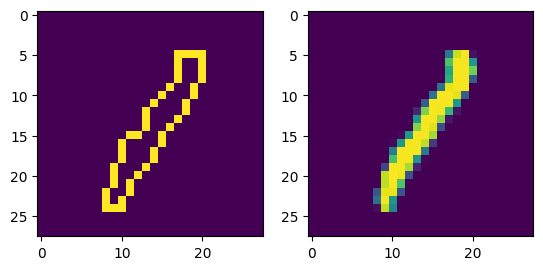

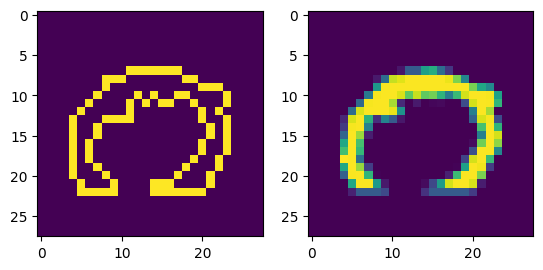

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

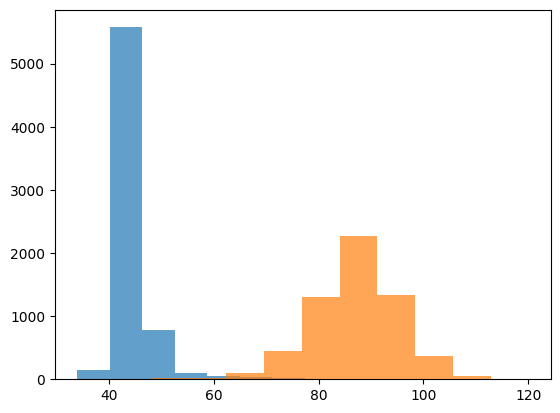

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

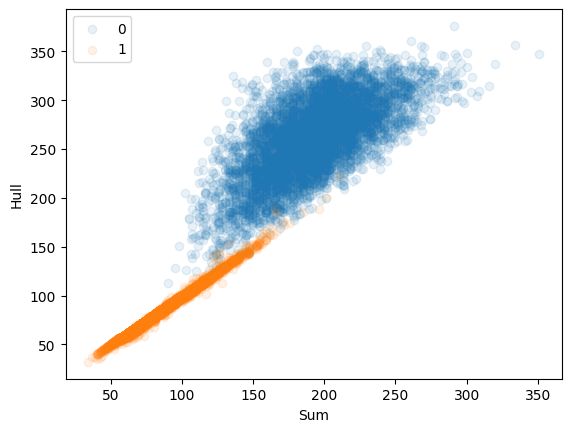

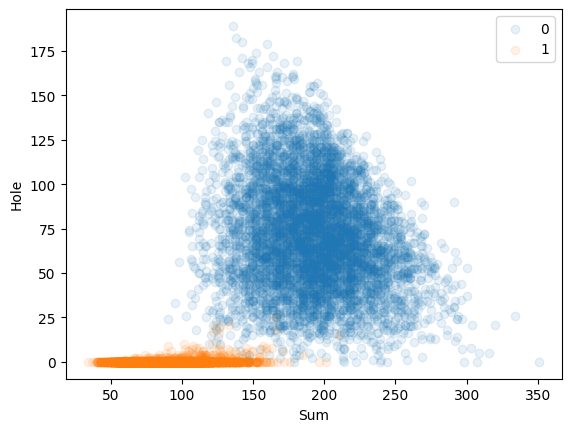

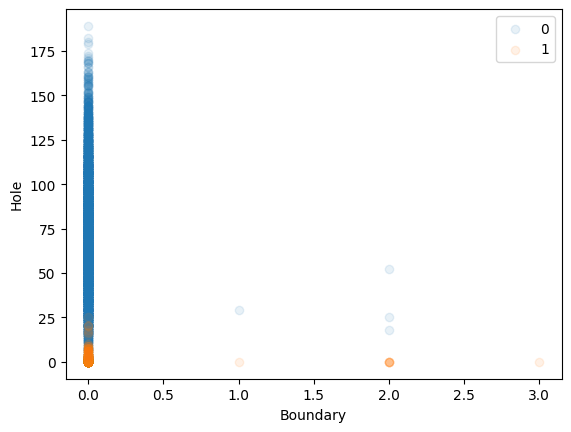

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume no0 and no1 images are already defined

def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii,:] = img2[ii,:] + img2[ii-1,:]
    img2 = img2 > 0
    return img2

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def getHolePixels(img):
    hull = getHullPixels(img)
    hole = hull & ~(img > 0)
    return hole

def getBoundaryPixels(img):
    boundary = np.zeros_like(img, dtype=bool)
    boundary[0,:] = img[0,:] > 0
    boundary[-1,:] = img[-1,:] > 0
    boundary[:,0] = img[:,0] > 0
    boundary[:,-1] = img[:,-1] > 0
    return boundary

# Calculate features
sum0 = np.sum(no0 > 0, axis=(1,2))
sum1 = np.sum(no1 > 0, axis=(1,2))

hull0 = np.array([getHullPixels(img).sum() for img in no0])
hull1 = np.array([getHullPixels(img).sum() for img in no1])

hole0 = np.array([getHolePixels(img).sum() for img in no0])
hole1 = np.array([getHolePixels(img).sum() for img in no1])

bound0 = np.array([getBoundaryPixels(img).sum() for img in no0])
bound1 = np.array([getBoundaryPixels(img).sum() for img in no1])

# Plots
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.legend(['0','1'])
plt.show()

plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary')
plt.ylabel('Hole')
plt.legend(['0','1'])
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

cl1 = ['class 1'] * len(sum1)
cl0 = ['class 0'] * len(sum0)

df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)),
                           np.concatenate((sum1, sum0)),
                           np.concatenate((bound1, bound0)),
                           np.concatenate((cl1, cl0)))),
                  columns=['Hole', 'Sum', 'Boundary', 'Class'])

df.head()

fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()


1. Which is the best combination of features?

    Usually, combinations like (Hole, Boundary, Sum) seem useful because they capture shape (boundary), filled space (sum), and internal gaps (hole).

    You can test combinations by training a classifier (like logistic regression or SVM) with different feature sets and comparing accuracy.

    Features that separate classes clearly in scatter or 3D plots are often better.

2. How would you test or visualize four or more features?

    Visualize:

        Use pair plots (scatter plots for every pair of features) using libraries like seaborn.pairplot().

        Use dimensionality reduction techniques like PCA or t-SNE to reduce 4+ features to 2D or 3D for visualization.

    Test:

        Use classification algorithms and evaluate performance (accuracy, F1-score).

        Use feature importance methods to see which features contribute most.

3. Can you come up with your own features?

Yes! Some ideas:

    Aspect ratio: Width to height of the digit’s bounding box.

    Number of connected components: Count of separate pixel blobs.

    Stroke thickness: Average width of strokes.

    Symmetry: Compare left and right halves of the digit.

    Centroid position: Average position of the digit pixels.

These can help capture different characteristics of digits.

4. Will these features work for different classes other than 0 and 1?

    Maybe yes, but with caution.

    Features like holes and boundaries are good for digits with closed loops (like 0, 6, 8, 9).

    For digits without holes (like 1, 2, 3), other features like strokes or symmetry might help more.

    For multiple classes, combining many features and using classifiers can improve performance.

5. What will happen if we take more than two classes at a time?

    The problem becomes multi-class classification instead of binary.

    Visualization becomes harder because scatter plots and 3D plots can’t show many classes clearly.

    You can use colors or shapes to mark classes, but with many classes, dimensionality reduction is better.

    You need classifiers that support multi-class (like Random Forest, SVM with multi-class, Neural Networks).

    Feature selection and engineering become even more important to separate multiple classes well.